Uber data analysis

In [14]:
#Import modules
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
matplotlib.style.use('ggplot')
import calendar


In [7]:
#Read the data
uber_data = pd.read_csv('My Uber Drives - 2016.csv')
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [8]:
#describe the data
uber_data.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [9]:
#check the null value
uber_data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

<AxesSubplot:>

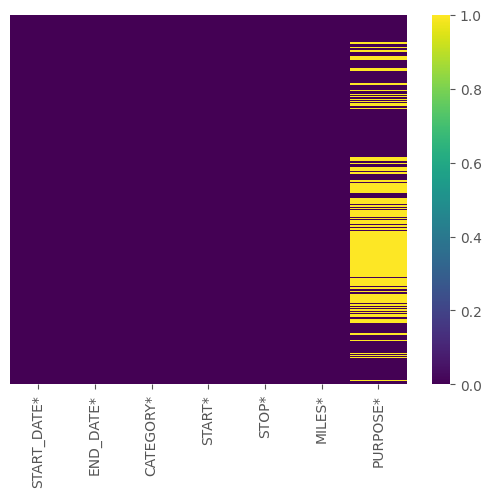

In [7]:
#make the heat map
sns.heatmap(uber_data.isnull(), yticklabels=False, cmap = "viridis")

<AxesSubplot:>

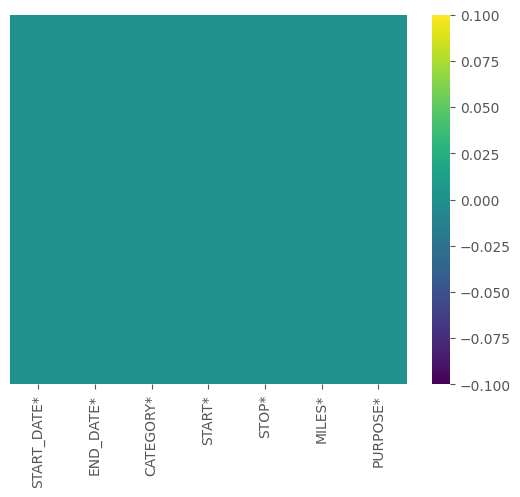

In [10]:
#drop the null values
uber_data = uber_data.dropna()
sns.heatmap(uber_data.isnull(),yticklabels=False, cmap="viridis")

In [12]:
uber_data['START_DATE*'] = pd.to_datetime(uber_data['START_DATE*'], format="%m/%d/%Y %H:%M" )
uber_data['END_DATE*'] = pd.to_datetime(uber_data['END_DATE*'], format="%m/%d/%Y %H:%M")

In [15]:
hour = []
day = []
dayofweek = []
month = []
weekday = []
for x in uber_data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
uber_data['HOUR'] = hour
uber_data['DAY'] = day
uber_data['DAY_OF_WEEK'] = dayofweek
uber_data['MONTH'] = month
uber_data['WEEKDAY'] = weekday

In [16]:
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


In [17]:
#finding travelling time
time = []
uber_data['TRAVELLING_TIME'] = uber_data['END_DATE*'] - uber_data['START_DATE*']
for i in uber_data['TRAVELLING_TIME']:
    time.append(i.seconds/60)
uber_data['TRAVELLING_TIME'] = time
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY,TRAVELLING_TIME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday,6.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday,67.0
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday,4.0


In [18]:
#Calculating Avg speed of the Trip
uber_data['TRAVELLING_TIME'] = uber_data['TRAVELLING_TIME']/60
uber_data['SPEED'] = uber_data['MILES*']/uber_data['TRAVELLING_TIME']
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY,TRAVELLING_TIME,SPEED
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday,0.100000,51.000000
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday,0.216667,22.153846
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,0.233333,20.142857
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday,1.116667,57.044776
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday,0.066667,64.500000


<AxesSubplot:ylabel='count'>

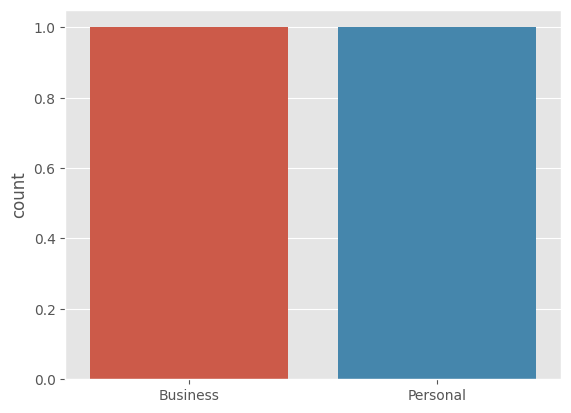

In [20]:
#Visualizing the Data
sns.countplot(x=uber_data['CATEGORY*'].value_counts().index, data=uber_data)


<AxesSubplot:ylabel='Frequency'>

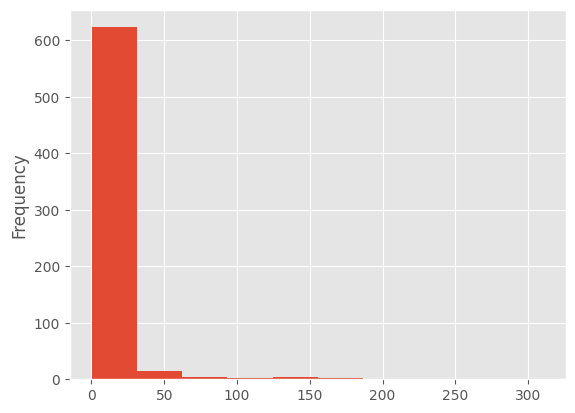

In [21]:
#Histogram for miles.
uber_data['MILES*'].plot.hist()

Text(5.069444444444445, 0.5, 'count')

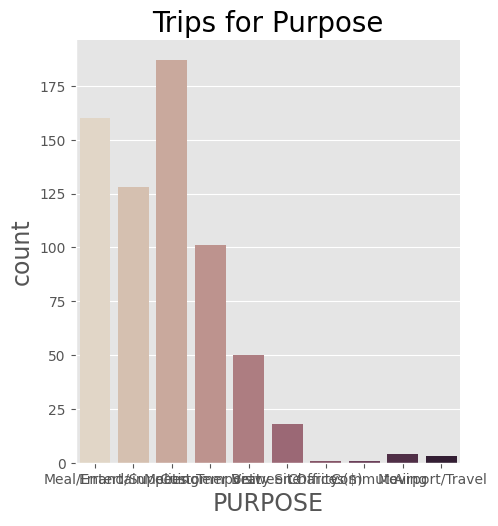

In [23]:
#Trips for purpose
sns.catplot(x="PURPOSE*", kind="count", palette="ch:.25", data=uber_data)
plt.title("Trips for Purpose", fontsize = 20)
plt.xlabel("PURPOSE",fontsize=17)
plt.ylabel("count", fontsize=17)

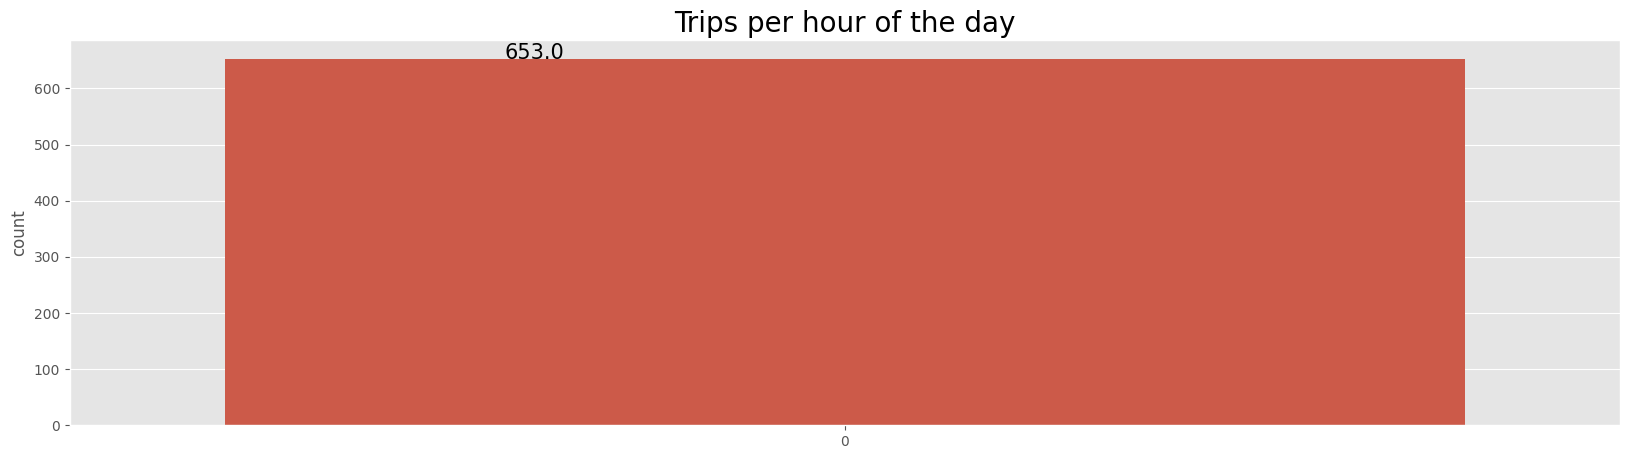

In [33]:
#Trips per hour of the day.
plt.figure(figsize = (20,5))
ax=sns.countplot(uber_data['HOUR'])
ax.set_title("Trips per hour of the day", fontsize = 20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=15, ha="center")

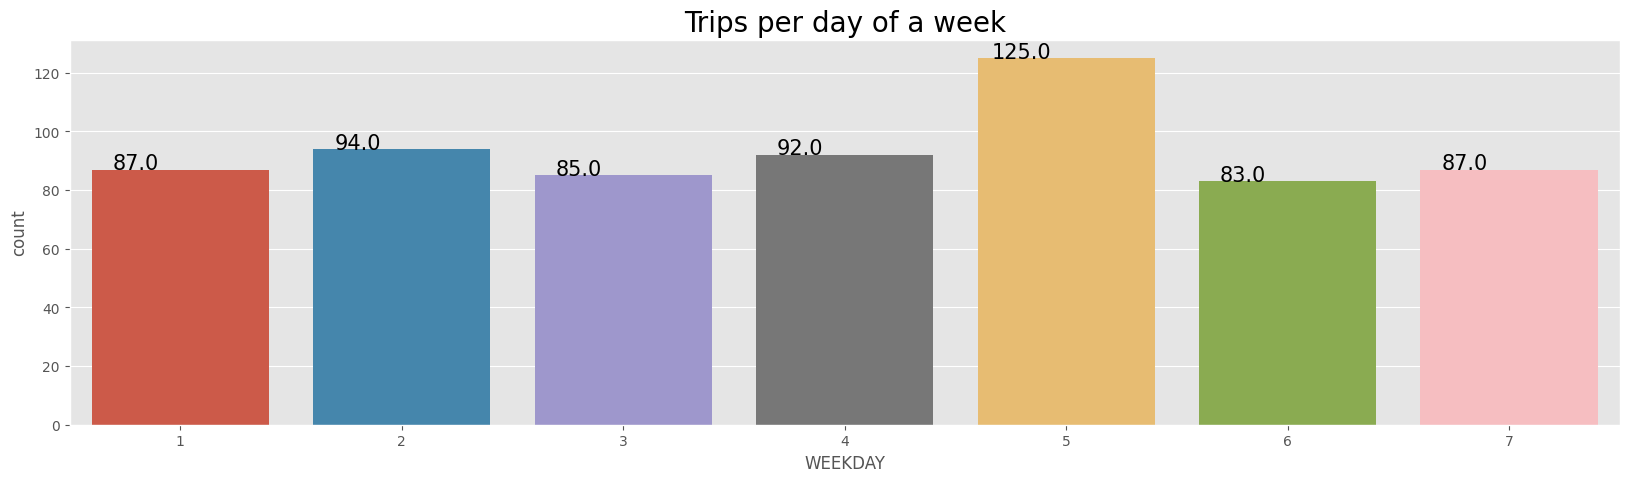

In [31]:
#Trips per day of a week
plt.figure(figsize=(20,5))
ax = sns.countplot(x=uber_data['WEEKDAY'].map({'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}))
ax.set_title("Trips per day of a week", fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=15, ha="center")

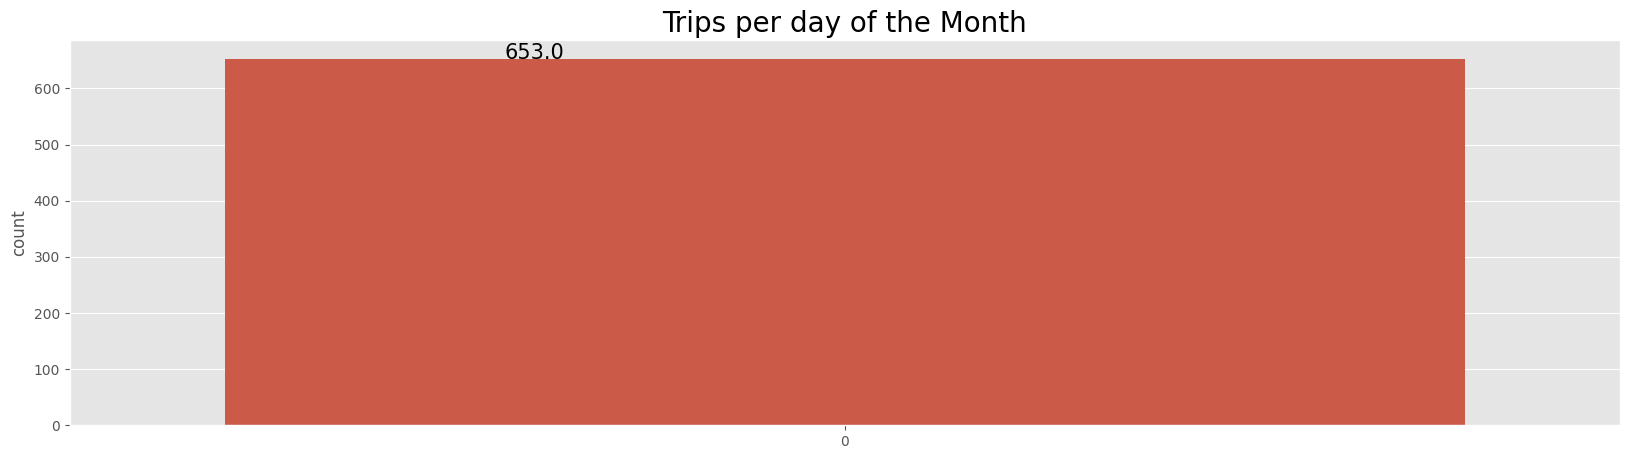

In [36]:
#Trips per day of the month
plt.figure(figsize = (20,5))
ax=sns.countplot(uber_data['DAY'])
ax.set_title("Trips per day of the Month", fontsize = 20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=15, ha="center")

<AxesSubplot:>

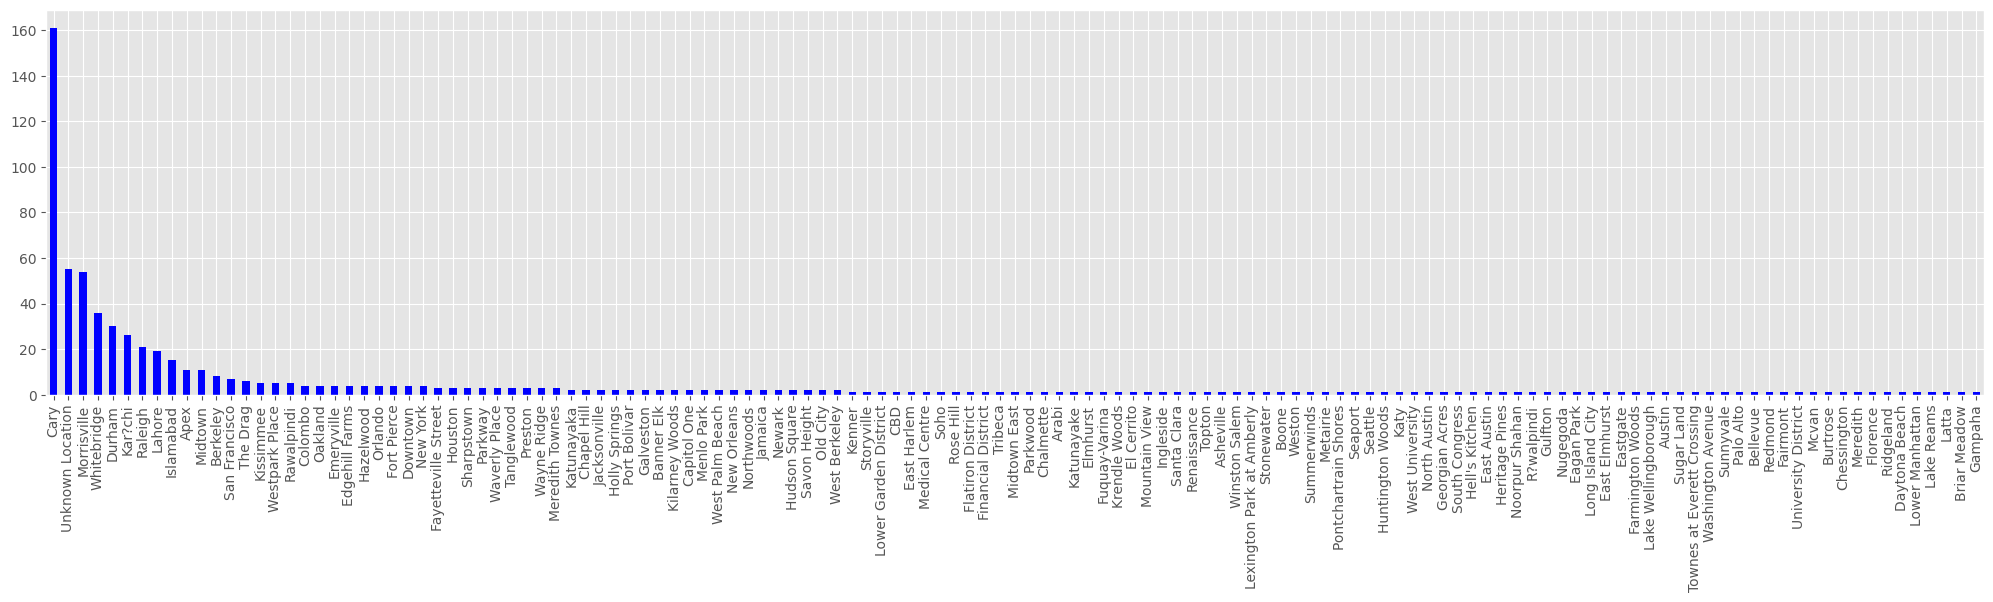

In [39]:
#The starting points of trips.
uber_data['START*'].value_counts().plot(kind = 'bar', figsize = (25,5), color = 'blue')

C:\Users\deagn\AppData\Local\Temp\ipykernel_17776\1015722791.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  uber_data.groupby('PURPOSE*').mean().plot(kind='bar', figsize=(15,5))


<AxesSubplot:xlabel='PURPOSE*'>

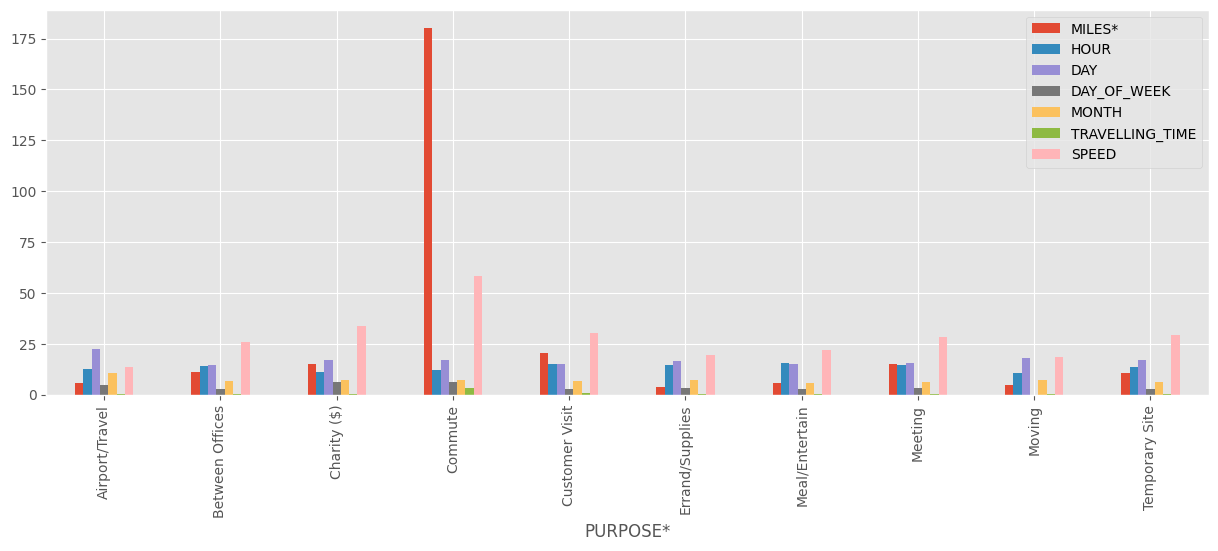

In [40]:
#Comparing all the purpose with miles, hour, day of the month, day of the week, month, Travelling time
uber_data.groupby('PURPOSE*').mean().plot(kind='bar', figsize=(15,5))